# This notebook is designed to take MAG-specific KO annotations and identify genes that differ significantly between two groups of MAGs. To run it, you will need KofamScan output files for each MAG, and the "master" KO file.

In [1]:
import os as os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import glob as glob
from scipy import stats

/Users/npatin3/miniconda/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Function to import kofamscan outputs for each MAG, remove empty rows, and add a column with the MAG name

In [2]:
def make_mag_ko_matrix(file):
    a, b = file.split('.')
    c, d, e, f, g = a.split('_')
    name = c + '_' + d + '_' + e
    ko = pd.read_csv(file, sep='\t', names=['ORF', 'KO'])
    ko_mag = pd.DataFrame(ko['KO'])
    ko_mag.dropna(inplace=True)
    ko_mag['MAG'] = name
    return(ko_mag)

#### Navigate to directory with kofamscan outputs

In [3]:
os.chdir('/Users/npatin3/Dropbox (GaTech)/Norovirus/Annotation/kofamscan/mags/Group2_kofams')

### Loop through all kofamscan outputs and concatenate them into one file with MAG-specific column included

In [4]:
ko_mags_all2 = []
for file in glob.glob("*.txt"):
    x = make_mag_ko_matrix(file)
    ko_mags_all2.append(x)
    
ko_mags_all2 = pd.concat(ko_mags_all2)
ko_mags_all2.head()

,KO,MAG
2,K18929,36_12_003
3,K18928,36_12_003
4,K02469,36_12_003
8,K06113,36_12_003
10,K00208,36_12_003


### Reformat the data frame for the heat map

In [5]:
df2 = pd.pivot_table(data=ko_mags_all2, index='MAG',columns='KO',aggfunc=len).fillna(0)
df2.head()

KO,K00003,K00005,K00009,K00010,K00012,K00013,K00014,K00016,K00018,K00024,...,K23393,K23475,K23508,K23509,K23514,K23518,K23535,K23536,K23537,K23573
MAG,,,,,,,,,,,,,,,,,,,,,
13_1_001,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14_1_002,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
15_1_010,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
15_1_014,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0
15_1_015,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Drop the outliers

In [100]:
df2.drop('36_5_004', inplace=True)
df2.drop('46_4_003', inplace=True)

### Drop all columns containing only zeros

In [6]:
df2 = df2.loc[:, (df2 != 0).any(axis=0)]

### If needed, go to a different directory and import the next group of MAG-specific kofams

In [7]:
os.chdir('/Users/npatin3/Dropbox (GaTech)/Norovirus/Annotation/kofamscan/mags/Group1_kofams')

### Same process as for the first group of MAGs

In [8]:
ko_mags_all1 = []
for file in glob.glob("*kofams.txt"):
    x = make_mag_ko_matrix(file)
    ko_mags_all1.append(x)
    
ko_mags_all1 = pd.concat(ko_mags_all1)
ko_mags_all1.head()

,KO,MAG
1,K07030,38_6_017
4,K00962,38_6_017
5,K02956,38_6_017
6,K03310,38_6_017
7,K07979,38_6_017


In [9]:
df1 = pd.pivot_table(data=ko_mags_all1, index='MAG',columns='KO',aggfunc=len).fillna(0)
df1.head()

KO,K00003,K00005,K00012,K00013,K00014,K00016,K00018,K00020,K00027,K00029,...,K23393,K23398,K23509,K23514,K23518,K23535,K23536,K23537,K23541,K23573
MAG,,,,,,,,,,,,,,,,,,,,,
15_3_004,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,2.0,2.0,1.0,0.0,0.0
15_3_006,1.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0
15_6_004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15_6_011,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
15_8_002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Merge the two group data frames

In [45]:
df_both = pd.concat([df1, df2]).fillna(0)
df_both.head()

,K00003,K00005,K00012,K00013,K00014,K00016,K00018,K00020,K00027,K00029,...,K23265,K23270,K23300,K23301,K23302,K23303,K23349,K23356,K23475,K23508
MAG,,,,,,,,,,,,,,,,,,,,,
15_3_004,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15_3_006,1.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15_6_004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15_6_011,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15_8_002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### for a presence/absence matrix

In [274]:
df_both_presabs = df_both.astype(bool).astype(int)

In [11]:
df_both.to_csv("MAG_KOs_bothgroups.csv")

## Calculate fold change and run t-tests on genes in increase MAGs / decrease MAGs 

### Add two new rows for statistical results

In [58]:
df_ttest = df_both.append(pd.Series(name='ttest'))
df_ttest = df_ttest.append(pd.Series(name='p-value'))
df_ttest.tail()

/Users/npatin3/miniconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.
/Users/npatin3/miniconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


,K00003,K00005,K00012,K00013,K00014,K00016,K00018,K00020,K00027,K00029,...,K23188,K23243,K23254,K23265,K23270,K23300,K23301,K23302,K23303,K23508
MAG,,,,,,,,,,,,,,,,,,,,,
4_1_001,0.0,0.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4_1_004,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4_4_014,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ttest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p-value,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Fill new rows with results fo scipy t-tests

In [59]:
df_ttest.iloc[39] = np.array(stats.ttest_ind(df_ttest.iloc[:13, :], df_ttest.iloc[13:39, :], axis=0, equal_var=False))[0]
df_ttest.iloc[40] = np.array(stats.ttest_ind(df_ttest.iloc[:13, :], df_ttest.iloc[13:39, :], axis=0, equal_var=False))[1]
df_ttest.head()

,K00003,K00005,K00012,K00013,K00014,K00016,K00018,K00020,K00027,K00029,...,K23188,K23243,K23254,K23265,K23270,K23300,K23301,K23302,K23303,K23508
MAG,,,,,,,,,,,,,,,,,,,,,
15_3_004,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15_3_006,1.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15_6_004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15_6_011,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15_8_002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Function to calculate fold difference between asymptomatic and symptomatic samples

In [60]:
def fold_difference(df, num_symp_rows, num_sample_rows):
    set1 = df.iloc[0:num_symp_rows]
    set2 = df.iloc[num_symp_rows:num_sample_rows]
    mean_diff = np.mean(set1) / np.mean(set2)
    #print(mean_diff)
    return(mean_diff)

### Apply function to data frame to calculate fold difference of each column

In [61]:
df_ttest = df_ttest.replace(0, 0.000000001)
df_ttest.loc['fold change'] = fold_difference(df_ttest, 13, 39)
df_ttest

,K00003,K00005,K00012,K00013,K00014,K00016,K00018,K00020,K00027,K00029,...,K23188,K23243,K23254,K23265,K23270,K23300,K23301,K23302,K23303,K23508
MAG,,,,,,,,,,,,,,,,,,,,,
15_3_004,1.000000e+00,1.000000e-09,1.000000e-09,1.000000e+00,1.000000e+00,1.000000e-09,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e-09,...,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09
15_3_006,1.000000e+00,1.000000e-09,1.000000e-09,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e-09,1.000000e+00,1.000000e-09,...,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09
15_6_004,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,...,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09
15_6_011,1.000000e+00,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e+00,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,...,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09
15_8_002,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,...,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09
15_8_006,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,...,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09
36_11_004,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e+00,...,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09
36_4_001,2.000000e+00,1.000000e-09,1.000000e-09,1.000000e-09,3.000000e+00,1.000000e+00,1.000000e-09,1.000000e-09,1.000000e+00,1.000000e-09,...,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09
37_9_007,1.000000e+00,2.000000e+00,1.000000e-09,1.000000e+00,1.000000e+00,1.000000e-09,1.000000e+00,1.000000e-09,1.000000e+00,1.000000e-09,...,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09


### Select only KOs that are significantly different between the groups, with a p-value of 0.02

In [62]:
kos_signif = df_ttest.loc[:, df_ttest.loc['p-value'] < 0.02]
kos_signif.shape

(42, 277)

### Save this matrix of KOs to a file

In [59]:
kos_signif.to_csv("MAG_SDKOs_p02.csv")

### Save just the list of significantly different KOs

In [68]:
ko_sd_list = list(kos_signif.columns)

In [33]:
with open("MAG_SDKOs_p02.txt", "w") as output:
    output.write(str(ko_sd_list))

# Get functions of significantly different KOs

### Import the "master" KO htext file

In [12]:
ko_master = '/Users/npatin3/Dropbox (GaTech)/Workflows/KO_Orthology_ko00001.txt'

### Match the KO number in column 3 of the master file with the KO list

In [14]:
# KO list
kos_unfilt = df_both.columns.to_list()

In [15]:
with open(ko_master, 'r') as file, open('MAG_KOs_fxns_unfilt.tsv', 'w') as outfile:
    for line in file:
        X = line.rstrip().split('\t')
        konumber = X[3].split(' ')[0]
        if konumber in kos_unfilt:
            outfile.write(line)

In [75]:
kos = pd.read_csv('MAG_KOs_fxns_unfilt.tsv', names=['Group','Subgroup1','Subgroup2','KO'], sep='\t')
kos.head()

,Group,Subgroup1,Subgroup2,KO
0,09100 Metabolism,09101 Carbohydrate metabolism,00010 Glycolysis / Gluconeogenesis [PATH:ko00010],K00844 HK; hexokinase [EC:2.7.1.1]
1,09100 Metabolism,09101 Carbohydrate metabolism,00010 Glycolysis / Gluconeogenesis [PATH:ko00010],K00845 glk; glucokinase [EC:2.7.1.2]
2,09100 Metabolism,09101 Carbohydrate metabolism,00010 Glycolysis / Gluconeogenesis [PATH:ko00010],"K01810 GPI, pgi; glucose-6-phosphate isomeras..."
3,09100 Metabolism,09101 Carbohydrate metabolism,00010 Glycolysis / Gluconeogenesis [PATH:ko00010],"K06859 pgi1; glucose-6-phosphate isomerase, a..."
4,09100 Metabolism,09101 Carbohydrate metabolism,00010 Glycolysis / Gluconeogenesis [PATH:ko00010],"K00850 pfkA, PFK; 6-phosphofructokinase 1 [EC..."


In [76]:
kos.shape

(6198, 4)

### Exclude all irrelevant KEGG categories

In [77]:
searchfor = ['Human Diseases','Brite Hierarchies','Organismal Systems',
                                    'Cellular community - eukaryotes']
kos2 = kos.loc[~kos['Group'].str.contains('|'.join(searchfor))]

### Sanity check - kos2 should be much smaller than kos

In [78]:
kos2.shape

(3816, 4)

### Reformat the data frame text to make it more manageable/readable

In [79]:
# Split the function from the KO
kos2[['KO', 'Function']] = kos2['KO'].str.split(" ", n=1, expand=True)
#kos2 = kos.drop('PATH', axis=1)
kos2.head()

/Users/npatin3/miniconda/lib/python3.6/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Group,Subgroup1,Subgroup2,KO,Function
0,09100 Metabolism,09101 Carbohydrate metabolism,00010 Glycolysis / Gluconeogenesis [PATH:ko00010],K00844,HK; hexokinase [EC:2.7.1.1]
1,09100 Metabolism,09101 Carbohydrate metabolism,00010 Glycolysis / Gluconeogenesis [PATH:ko00010],K00845,glk; glucokinase [EC:2.7.1.2]
2,09100 Metabolism,09101 Carbohydrate metabolism,00010 Glycolysis / Gluconeogenesis [PATH:ko00010],K01810,"GPI, pgi; glucose-6-phosphate isomerase [EC:5..."
3,09100 Metabolism,09101 Carbohydrate metabolism,00010 Glycolysis / Gluconeogenesis [PATH:ko00010],K06859,"pgi1; glucose-6-phosphate isomerase, archaeal..."
4,09100 Metabolism,09101 Carbohydrate metabolism,00010 Glycolysis / Gluconeogenesis [PATH:ko00010],K00850,"pfkA, PFK; 6-phosphofructokinase 1 [EC:2.7.1.11]"


In [80]:
# Split out the "PATH" part of Subgroup2 label
kos2[['Subgroup2', 'PATH']] = kos2['Subgroup2'].str.split("[", n=1, expand=True)
kos2 = kos2.drop('PATH', axis=1)
kos2.head()

/Users/npatin3/miniconda/lib/python3.6/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Group,Subgroup1,Subgroup2,KO,Function
0,09100 Metabolism,09101 Carbohydrate metabolism,00010 Glycolysis / Gluconeogenesis,K00844,HK; hexokinase [EC:2.7.1.1]
1,09100 Metabolism,09101 Carbohydrate metabolism,00010 Glycolysis / Gluconeogenesis,K00845,glk; glucokinase [EC:2.7.1.2]
2,09100 Metabolism,09101 Carbohydrate metabolism,00010 Glycolysis / Gluconeogenesis,K01810,"GPI, pgi; glucose-6-phosphate isomerase [EC:5..."
3,09100 Metabolism,09101 Carbohydrate metabolism,00010 Glycolysis / Gluconeogenesis,K06859,"pgi1; glucose-6-phosphate isomerase, archaeal..."
4,09100 Metabolism,09101 Carbohydrate metabolism,00010 Glycolysis / Gluconeogenesis,K00850,"pfkA, PFK; 6-phosphofructokinase 1 [EC:2.7.1.11]"


In [88]:
# select only KOs that are in the ko_sd_list
kos_funct = kos2.loc[kos2['KO'].isin(ko_sd_list), :]

In [89]:
kos_funct.shape

(277, 5)

In [90]:
kos_funct = kos_funct[['KO','Function']].to_csv('MAG_KOs_SD_functions.csv')

### Format for heat map

### Exclude the last two rows (p-value and t-test results)

In [31]:
df_hmap = kos_signif.iloc[0:39, ]

In [32]:
# Square root transform if necessary
df_hmap_sqrt = np.sqrt(df_hmap.replace(0, 0.00000000001))

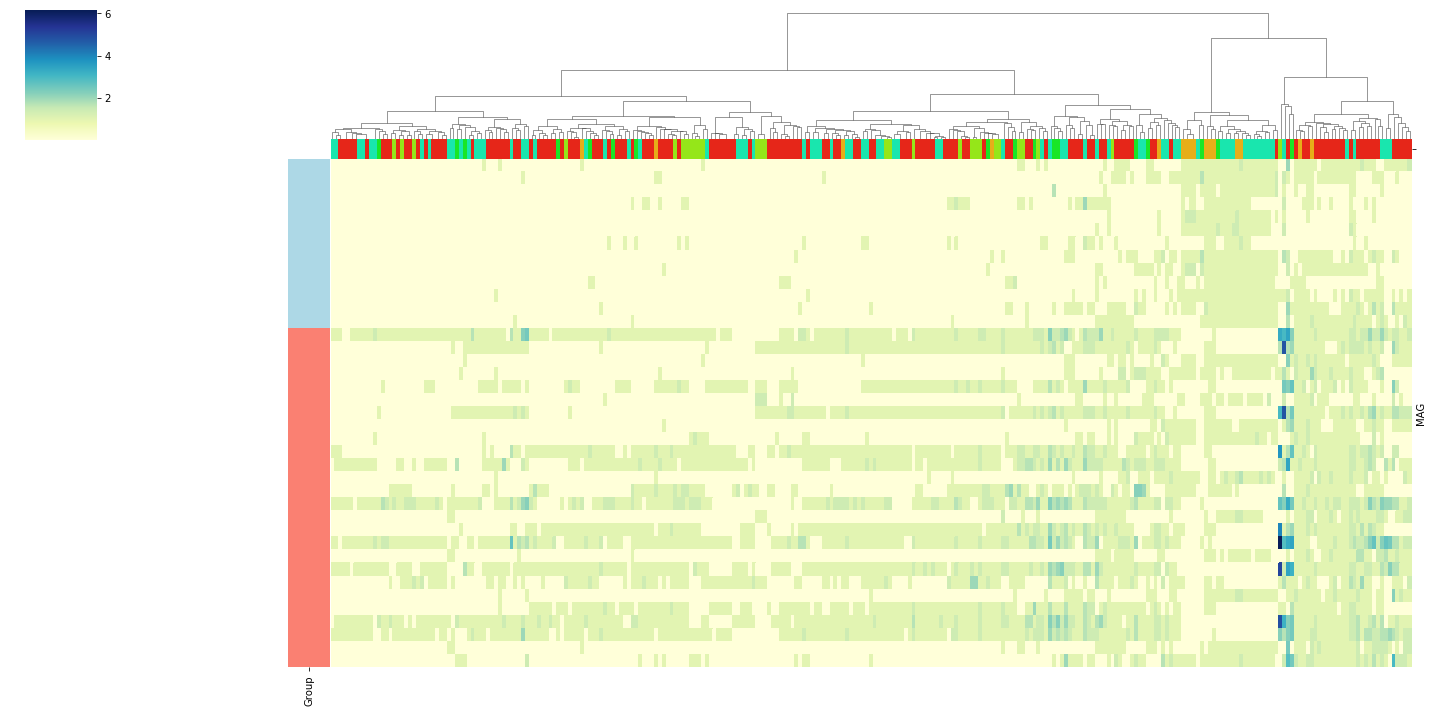

In [48]:
# Quick and dirty to check
p = sns.clustermap(df_hmap_sqrt, cmap='YlGnBu', figsize=(20,10), xticklabels=False, yticklabels=False,
                   row_cluster=False, method='ward', metric='euclidean', row_colors=sample_colors, 
                   col_colors=column_colors)

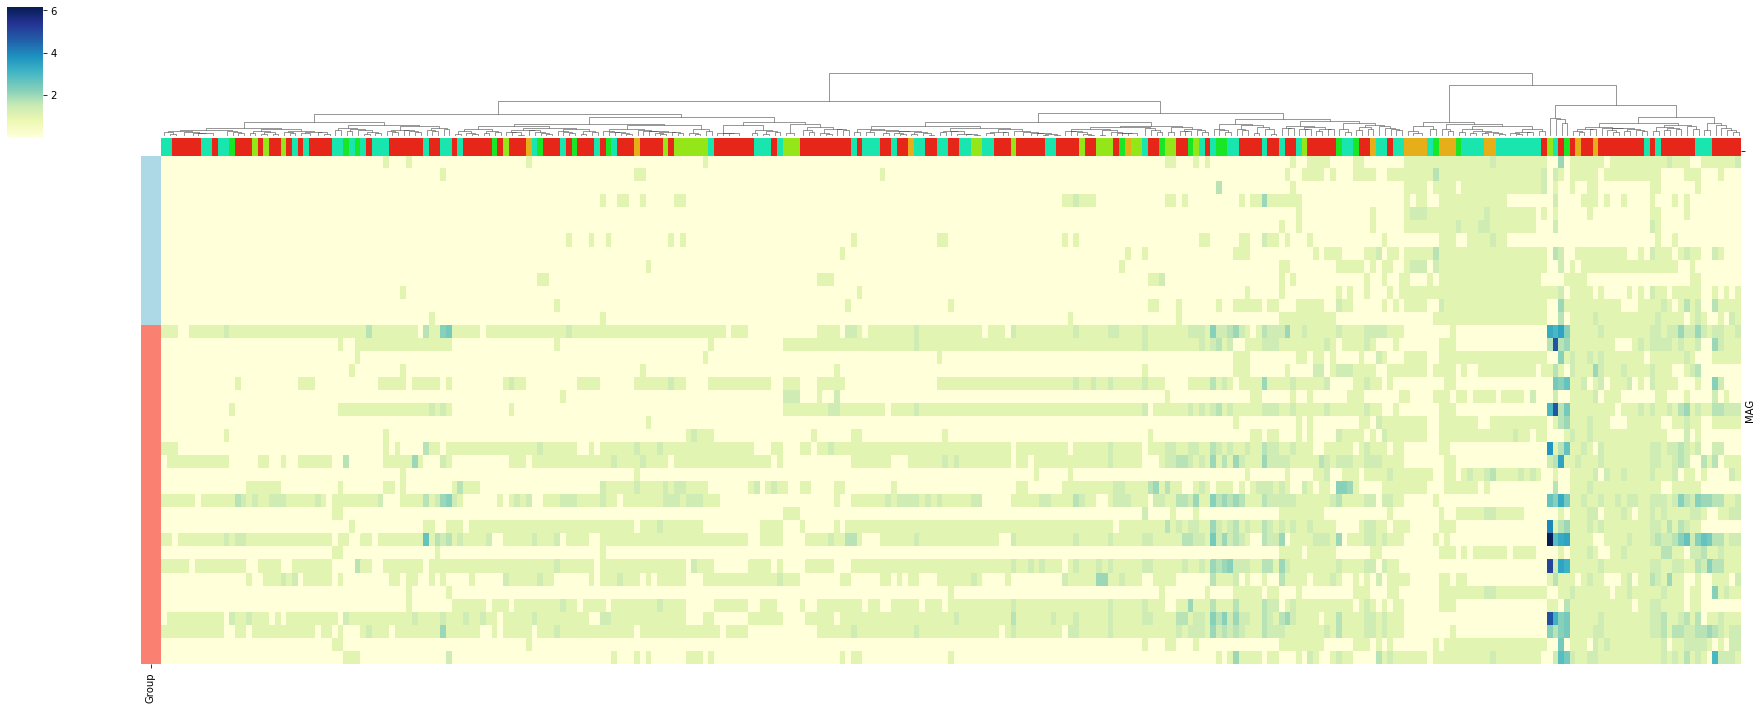

In [60]:
# Make it look pretty
# See below for sample_colors and column_colors
p = sns.clustermap(df_hmap_sqrt, cmap='YlGnBu', xticklabels=False, yticklabels=False, row_cluster=False,
                   method='ward', metric='euclidean', row_colors=sample_colors, col_colors=column_colors)
hm = p.ax_heatmap.get_position()
plt.setp(p.ax_heatmap.yaxis.get_majorticklabels(), fontsize=14)
plt.setp(p.ax_heatmap.xaxis.get_majorticklabels(), fontsize=8)
p.ax_heatmap.set_position([hm.x0, hm.y0, hm.width*3, hm.height])
col = p.ax_col_dendrogram.get_position()
row = p.ax_row_dendrogram.get_position()
p.ax_col_dendrogram.set_position([col.x0, col.y0, col.width*3, col.height*0.5])
p.ax_col_colors.set_position([col.x0, col.y0-0.04, col.width*3, col.height*0.2])
p.ax_row_dendrogram.set_position([row.x0+0.07, row.y0, row.width*0.75, row.height])

In [61]:
p.savefig("MAGs_KOs_clustermap_SDonlyp02_nomagclust_filt.png")

### Custom legend

In [346]:
%matplotlib inline

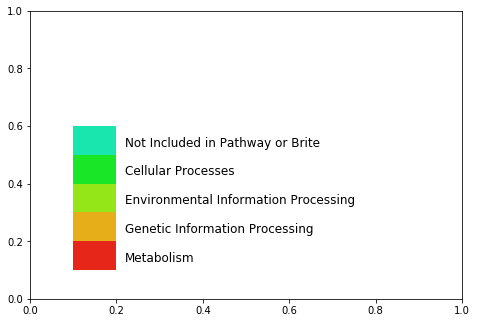

In [360]:
x, y = (0.1, 0)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
for func in kos_column_colors['Functional category'].unique():
    y = y + 0.1
    color = lut[func]
    #cat = lut3[ko]
    square = plt.Rectangle((x, y), 0.1, 0.1, fc=color)
    plt.gca().add_patch(square)
    plt.text(x + 0.12, y + 0.03, func, fontsize=12)

In [361]:
fig.savefig('fxn_labels.png')

## Set palettes for color bars

#### Use information about your samples to assing colors to each sample according to its group

In [35]:
mags1 = pd.DataFrame(ko_mags_all1['MAG']).drop_duplicates(subset=['MAG'])
mags2 = pd.DataFrame(ko_mags_all2['MAG']).drop_duplicates(subset=['MAG'])
mags1.head()

,MAG
1,38_6_017
2,36_11_004
1,46_4_008
3,49_1_005
0,15_8_002


In [36]:
mags1['Group'] = 'lightblue'
mags2['Group'] = 'salmon'
sample_colors = pd.concat([mags1, mags2]).set_index('MAG')

In [37]:
sample_colors.head()

,Group
MAG,
38_6_017,lightblue
36_11_004,lightblue
46_4_008,lightblue
49_1_005,lightblue
15_8_002,lightblue


### For columns

### This part is messy! I am open to feedback!

In [38]:
kos2.head()

,0,1,2,3,4
0,09100 Metabolism,09101 Carbohydrate metabolism,00010 Glycolysis / Gluconeogenesis [PATH:ko00010],K00844,HK; hexokinase [EC:2.7.1.1]
1,09100 Metabolism,09101 Carbohydrate metabolism,00010 Glycolysis / Gluconeogenesis [PATH:ko00010],K00845,glk; glucokinase [EC:2.7.1.2]
2,09100 Metabolism,09101 Carbohydrate metabolism,00010 Glycolysis / Gluconeogenesis [PATH:ko00010],K01810,"GPI, pgi; glucose-6-phosphate isomerase [EC:5...."
3,09100 Metabolism,09101 Carbohydrate metabolism,00010 Glycolysis / Gluconeogenesis [PATH:ko00010],K06859,"pgi1; glucose-6-phosphate isomerase, archaeal ..."
4,09100 Metabolism,09101 Carbohydrate metabolism,00010 Glycolysis / Gluconeogenesis [PATH:ko00010],K00850,"pfkA, PFK; 6-phosphofructokinase 1 [EC:2.7.1.11]"


In [39]:
kos_column_colors = kos2[[0, 3]]
kos_column_colors[[0, 'Functional category']] = kos_column_colors[0].str.split(" ", n=1, expand=True)
kos_column_colors = kos_column_colors.drop(0, axis=1)
kos_column_colors = kos_column_colors.rename({3:'KO'}, axis='columns')
kos_column_colors.head()

/Users/npatin3/miniconda/lib/python3.6/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,KO,Functional category
0,K00844,Metabolism
1,K00845,Metabolism
2,K01810,Metabolism
3,K06859,Metabolism
4,K00850,Metabolism


In [40]:
kos_column_colors['Functional category'].unique()

array(['Metabolism', 'Genetic Information Processing',
       'Environmental Information Processing', 'Cellular Processes',
       'Not Included in Pathway or Brite'], dtype=object)

In [41]:
custom_palette = sns.hls_palette(9, l=.5, s=.8)
lut = dict(zip(kos_column_colors['Functional category'].unique(), 
                custom_palette))

In [298]:
lut['Metabolism']

(0.9, 0.14799999999999996, 0.09999999999999998)

In [42]:
kos_column_colors['Color'] = kos_column_colors['Functional category'].map(lut)
kos_column_colors.head()

,KO,Functional category,Color
0,K00844,Metabolism,"(0.9, 0.14799999999999996, 0.09999999999999998)"
1,K00845,Metabolism,"(0.9, 0.14799999999999996, 0.09999999999999998)"
2,K01810,Metabolism,"(0.9, 0.14799999999999996, 0.09999999999999998)"
3,K06859,Metabolism,"(0.9, 0.14799999999999996, 0.09999999999999998)"
4,K00850,Metabolism,"(0.9, 0.14799999999999996, 0.09999999999999998)"


In [43]:
lut2 = dict(zip(kos_column_colors['KO'], 
                kos_column_colors['Color']))

In [305]:
lut2['K00844']

(0.585333333333333, 0.9, 0.09999999999999998)

In [44]:
lut3 = dict(zip(kos_column_colors['KO'], kos_column_colors['Functional category']))

In [304]:
lut3['K00844']

'Environmental Information Processing'

In [46]:
column_colors = pd.Series(lut2)

In [47]:
column_colors

K00844      (0.585333333333333, 0.9, 0.09999999999999998)
K00845    (0.9, 0.14799999999999996, 0.09999999999999998)
K01810    (0.9, 0.14799999999999996, 0.09999999999999998)
K06859    (0.9, 0.14799999999999996, 0.09999999999999998)
K00850      (0.585333333333333, 0.9, 0.09999999999999998)
                               ...                       
K07502     (0.09999999999999998, 0.9, 0.6813333333333333)
K07584     (0.09999999999999998, 0.9, 0.6813333333333333)
K07220     (0.09999999999999998, 0.9, 0.6813333333333333)
K07586     (0.09999999999999998, 0.9, 0.6813333333333333)
K07742     (0.09999999999999998, 0.9, 0.6813333333333333)
Length: 2680, dtype: object

In [56]:
# include only KOs that are in the list generated above
df_both = df_both.loc[:, df_both.columns.isin(kos_for_testing)]